In [ ]:
# 如果是xlsx
# pip install xlrd
# pip install openpyxl
# df = pd.read_excel('my_excel_file.xlsx',sheet_name='First_Sheet',engine='openpyxl')

## My Thought To This Data Challenge

## 1.Import Data

In [1]:
import numpy as np
import pandas as pd

In [28]:
#import datasets
ddf=pd.read_csv('Diagnosis.csv')
tdf=pd.read_csv('Treatment.csv')

## 2. Check Datasets

In [29]:
#check datasets informations
ddf.info()
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          44 non-null     int64  
 1   DiagnosisDate      44 non-null     object 
 2   DiagnosisCode      44 non-null     float64
 3   Diagnosis          44 non-null     object 
 4   IsCancerDiagnosis  44 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PatientID      714 non-null    int64 
 1   TreatmentDate  714 non-null    object
 2   DrugCode       714 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.9+ KB


In [30]:
#Noticed 'DiagnosisDate' and 'Treatmentdate' Dtype is not datetime. 

In [31]:
#Modify Datetime
tdf['TreatmentDate']=pd.to_datetime(tdf['TreatmentDate'])
ddf['DiagnosisDate']=pd.to_datetime(ddf['DiagnosisDate'])

### 2.1 Pre-Process Diagnosis Dataset(ddf)

In [35]:
ddf

,PatientID,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis
0,2634,2011-02-19,285.8,Anemia,False
1,5657,2012-06-07,285.8,Anemia,False
2,7937,2013-01-06,285.8,Anemia,False
3,8615,2013-07-18,284.9,Anemia,False
4,4354,2012-02-04,284.9,Anemia,False
5,6922,2012-11-01,285.9,Anemia,False
6,7230,2013-01-06,285.8,Anemia,False
7,2038,2010-01-21,174.9,Breast Cancer,True
8,2120,2010-01-09,174.1,Breast Cancer,True
9,2407,2010-06-13,174.9,Breast Cancer,True


In [61]:
#Check Duplicates
ddf=ddf.drop_duplicates()
ddf

,PatientID,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis
0,2634,2011-02-19,285.8,Anemia,False
1,5657,2012-06-07,285.8,Anemia,False
2,7937,2013-01-06,285.8,Anemia,False
3,8615,2013-07-18,284.9,Anemia,False
4,4354,2012-02-04,284.9,Anemia,False
5,6922,2012-11-01,285.9,Anemia,False
6,7230,2013-01-06,285.8,Anemia,False
7,2038,2010-01-21,174.9,Breast Cancer,True
8,2120,2010-01-09,174.1,Breast Cancer,True
9,2407,2010-06-13,174.9,Breast Cancer,True


In [39]:
#Cause we investigate cancer, so we can drop other disease data

In [82]:
#Drop useless data
cancer_ddf=ddf[ddf['IsCancerDiagnosis']== True]
cancer_ddf

,PatientID,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis
7,2038,2010-01-21,174.9,Breast Cancer,True
8,2120,2010-01-09,174.1,Breast Cancer,True
9,2407,2010-06-13,174.9,Breast Cancer,True
10,2425,2010-12-15,174.9,Breast Cancer,True
11,2462,2011-01-07,174.9,Breast Cancer,True
12,2763,2011-04-19,174.1,Breast Cancer,True
13,3757,2011-10-11,174.1,Breast Cancer,True
14,3948,2011-12-18,174.6,Breast Cancer,True
15,4256,2011-11-07,174.5,Breast Cancer,True
16,4354,2012-02-04,174.8,Breast Cancer,True


### 2.2 Pre-Process Treatment Dataset(tdf)

In [59]:
#Drop Duplicates
tdf=tdf.drop_duplicates()
tdf

,PatientID,TreatmentDate,DrugCode
0,2038,2010-01-24,A
1,2038,2010-01-27,A
2,2038,2010-01-30,A
3,2038,2010-02-02,A
4,2038,2010-02-06,A
...,...,...,...
709,9331,2013-11-03,C
710,9331,2013-11-09,C
711,9331,2013-11-15,C
712,9331,2013-11-21,C


In [65]:
 #Merge with Diagnosis dataset and drop non-cancer data
mergedf=pd.merge(cancer_ddf,tdf,how='inner',on='PatientID')
mergedf

,PatientID,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis,TreatmentDate,DrugCode
0,2038,2010-01-21,174.9,Breast Cancer,True,2010-01-24,A
1,2038,2010-01-21,174.9,Breast Cancer,True,2010-01-27,A
2,2038,2010-01-21,174.9,Breast Cancer,True,2010-01-30,A
3,2038,2010-01-21,174.9,Breast Cancer,True,2010-02-02,A
4,2038,2010-01-21,174.9,Breast Cancer,True,2010-02-06,A
...,...,...,...,...,...,...,...
805,7242,2013-01-11,153.5,Colon Cancer,True,2014-08-06,C
806,7242,2013-01-11,153.5,Colon Cancer,True,2014-08-26,C
807,7242,2013-01-11,153.5,Colon Cancer,True,2014-09-15,C
808,7242,2013-01-11,153.5,Colon Cancer,True,2014-10-05,C


## 3. Question: Find patients who got second line drug's proportion 

### 3.1 My Ideas: FInd patients who got second line and divided by all patients num
#First we should Define patients who got second line drugs:
1. They took one type drug only('A',or 'B' or 'C');
2. They took one type drug('A',or 'B' or 'C') as first-line, and then took anouther drug as second-line;
3. They took combinations drug('A&B',or 'A&C',or'B&C') as first-line and then took another one type drug as second-line;
4. They took one drug as first-line and then took comination drug;

Only 2,3,4 situation can be defined as got second line.

#Steps to Solve this problem:
1. Find all Patients number(all traeted cancer patients);
2. Find numbers of Patients who got second line drug;
3. Calculate proportion;

### 3.2 My Solutions

In [76]:
#Find all treated cancer patients
All_Patients=len(cancer_df['PatientID'].unique())
unique

27

In [81]:
#Find numbers of patients who took second line drug
secline_patients_num=0
for name, group in mergedf.groupby('PatientID'):
    drugs_name=group['DrugCode'].unique()
#Find numbers of patients who took second line drug
secline_patients_num=0
for name, group in mergedf.groupby('PatientID'):
    drugs_name=group['DrugCode'].unique()
    date_list= [list(group[group['DrugCode']==d]['TreatmentDate'])[0] for d in drugs_name]
    if len(date_list)==2:
        if date_list[0]!=date_list[1]:
            secline_patients_num+=1
    elif len(date_list)==3:
        if date_list[2]!=date_list[1]:
            secline_patients_num+=1
    else:pass
print('All patients number is:' ,All_Patients)
print('Numbers of patients who got second-line drugs: ',secline_patients_num)
Percentage= secline_patients_num/All_Patients *100
print('Percentage of patients who got second line drug is:',round(Percentage,2),'%')    if len(date_list)==2:
        if date_list[0]!=date_list[1]:
            secline_patients_num+=1
    elif len(date_list)==3:
        if date_list[2]!=date_list[1]:
            secline_patients_num+=1
    else:pass
print('All patients number is:' ,All_Patients)
print('Numbers of patients who got second-line drugs: ',secline_patients_num)
Percentage= secline_patients_num/All_Patients *100
print('Percentage of patients who got second line drug is:',round(Percentage,2),'%')

All patients number is: 27
Numbers of patients who got second-line drugs:  7
Percentage of patients who got second line drug is: 25.93 %


### 3.2 My understand of Solutions:
The result is 25.93%, In clinic, we can see 26% patients got second line drugs in givin datasets.

## 4.Questions:How do the drugs used at clinic compare in terms of duration of therapy?

### My Ideas:
There are 3 ways to use these 3 drugs to treat patients:
1. Only use one durg('A',or'B'or 'C')
2. Use 2 drugs combination ('AB' or 'AC' or 'BC')
3. Use 3 drugs combination ('ABC'）
In order to figure out how 3 drugs are given(to give sigle or 2 combinations or 3 combinations), we should figure out thouse 3 ways separatly and analyze them. And most importantly, we should separte cancer types!

### 4.1 Breast Cancer

In [236]:
bcdf=mergedf[mergedf['Diagnosis']=='Breast Cancer']
bc_groupdf=bcdf.groupby(['PatientID'])

In [237]:
bc_groupdf['DrugCode'].unique()

PatientID
2038          [A]
2120       [A, B]
2407       [A, B]
2425       [A, B]
2462       [A, B]
2763       [A, B]
3757          [C]
3948       [A, B]
4256          [C]
4354          [C]
4374          [C]
4692    [A, B, C]
5259    [A, B, C]
6281    [A, B, C]
6321    [A, B, C]
6877          [C]
6889          [C]
7796          [A]
7976          [A]
9331          [C]
Name: DrugCode, dtype: object

### 4.1.1 Notes:
#we can see for breast cancer there are following treatment:
1. Single Drug: 'A'(2038,7796,7976) or 'C'(3757,4256,4354,4374,6877,6889,9331)
2. 2 drugs combinations:'AB'(2120,2407,2425,2462,2763)
3. 3 drugs combinations: 'ABC'(4692,5259,6281,6321)

In [238]:
# single drug caculate
# A Drug
Amin=bcdf.set_index('PatientID').loc[[2038,7796,7976]].groupby('PatientID').min()
Amax=bcdf.set_index('PatientID').loc[[2038,7796,7976]].groupby('PatientID').max()
A=(Amax['TreatmentDate']-Amin['TreatmentDate']).mean().days
print('A drugs average treat time: ',A,'Days')

A drugs average treat time:  57 Days


In [239]:
# C Drug
Cmin=bcdf.set_index('PatientID').loc[[3757,4256,4354,4374,6877,6889,9331]].groupby('PatientID').min()
Cmax=bcdf.set_index('PatientID').loc[[3757,4256,4354,4374,6877,6889,9331]].groupby('PatientID').max()
C=(Cmax['TreatmentDate']-Cmin['TreatmentDate']).mean().days
print('C drugs average treat time: ',C,'Days')

C drugs average treat time:  76 Days


In [240]:
# 2 Drugs Combinations
#AB
ABmin=bcdf.set_index('PatientID').loc[[2120,2407,2425,2462,2763]].groupby('PatientID').min()
ABmax=bcdf.set_index('PatientID').loc[[2120,2407,2425,2462,2763]].groupby('PatientID').max()
AB=(ABmax['TreatmentDate']-ABmin['TreatmentDate']).mean().days
print('AB drugs average treat time: ',AB,'Days')

AB drugs average treat time:  48 Days


In [241]:
# 3 Drugs Combinations
#ABC
ABCmin=bcdf.set_index('PatientID').loc[[4692,5259,6281,6321]].groupby('PatientID').min()
ABCmax=bcdf.set_index('PatientID').loc[[4692,5259,6281,6321]].groupby('PatientID').max()
ABC=(ABCmax['TreatmentDate']-ABCmin['TreatmentDate']).mean().days
print('drugs average treat time: ',ABC,'Days')

drugs average treat time:  165 Days


## 4.2 Colon Cancer

In [243]:
ccdf=mergedf[mergedf['Diagnosis']=='Colon Cancer']
cc_groupdf=ccdf.groupby(['PatientID'])

In [235]:
cc_groupdf['DrugCode'].unique()

PatientID
2770    [A, B]
3095       [A]
3449       [C]
3757       [C]
6837    [B, C]
6877       [C]
6922       [C]
7230       [C]
7242    [B, C]
Name: DrugCode, dtype: object

### 4.2.1 Notes:
#we can see for breast cancer there are following treatment:
1. Single Drug: 'A'(3095) or 'C'(3449,3757,6877,6922,7230)
2. 2 drugs combinations:'AB'(2770),'BC':6837,7242
3. 3 drugs combinations: N/A

In [231]:
# single drug caculate
# A Drug

Colon_Amin=ccdf.set_index('PatientID').loc[3095].groupby('PatientID').min()
Colon_Amax=ccdf.set_index('PatientID').loc[3095].groupby('PatientID').max()
Colon_A=(Colon_Amax['TreatmentDate']-Colon_Amin['TreatmentDate']).mean().days
print('A drugs average treat time: ',Colon_A,'Days')

A drugs average treat time:  61 Days


In [232]:
# single drug caculate
# C Drug

Colon_Cmin=ccdf.set_index('PatientID').loc[[3449,3757,6877,6922,7230]].groupby('PatientID').min()
Colon_Cmax=ccdf.set_index('PatientID').loc[[3449,3757,6877,6922,7230]].groupby('PatientID').max()
Colon_C=(Colon_Cmax['TreatmentDate']-Colon_Cmin['TreatmentDate']).mean().days
print('A drugs average treat time: ',Colon_C,'Days')

A drugs average treat time:  78 Days


In [233]:
# 2drug caculate
# AB Drug

Colon_ABmin=ccdf.set_index('PatientID').loc[[2770]].groupby('PatientID').min()
Colon_ABmax=ccdf.set_index('PatientID').loc[[2770]].groupby('PatientID').max()
Colon_AB=(Colon_ABmax['TreatmentDate']-Colon_ABmin['TreatmentDate']).mean().days
print('A drugs average treat time: ',Colon_C,'Days')

A drugs average treat time:  78 Days


In [234]:
# 2drug caculate
# BC Drug

Colon_BCmin=ccdf.set_index('PatientID').loc[[6837,7242]].groupby('PatientID').min()
Colon_BCmax=ccdf.set_index('PatientID').loc[[6837,7242]].groupby('PatientID').max()
Colon_BC=(Colon_BCmax['TreatmentDate']-Colon_BCmin['TreatmentDate']).mean().days
print('A drugs average treat time: ',Colon_C,'Days')

A drugs average treat time:  78 Days


## 4.3 Visualization

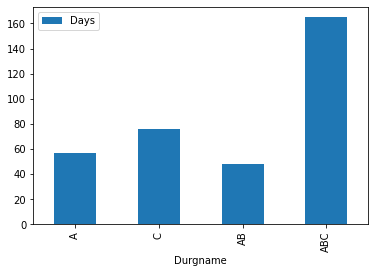

In [272]:
df = pd.DataFrame({'Durgname':['A', 'C', 'AB','ABC'], 'Days':[57,76,48,165]})
ax = df.plot.bar(x='Durgname', y='Days')

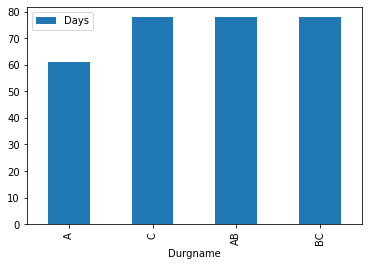

In [268]:
df = pd.DataFrame({'Durgname':['A', 'C', 'AB','BC'], 'Days':[61,78,78,78]})
ax = df.plot.bar(x='Durgname', y='Days')

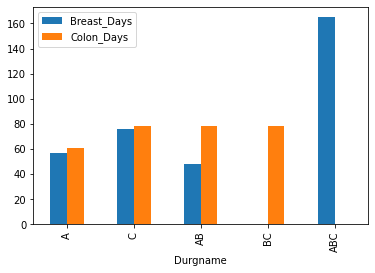

In [271]:
df = pd.DataFrame({'Durgname':['A', 'C', 'AB','BC','ABC'], 'Breast_Days':[57,76,48,0,165,],'Colon_Days':[61,78,78,78,0]})
ax = df.plot.bar(x='Durgname', y=['Breast_Days','Colon_Days'])

## 4.4 Conclusion

- **Single use** :'**A**',**B**',**C**' 
- **Combinations**:'AB','BC','AC','ABC';

---
From the result, we can conclue the following :
1. we cannot got any practical result that can be implement in clinic, because the following reson:
  - Lacking data in each cancer type(eg.'B','AC',BC' in Breast Cancer;'B','AC','ABC'in Colon Cancer);
  - Datasets are too small to give clinicians any suggestions,need more patients data;
  - Lack Important patients' information,eg.age,gender, race, and other important criteria. 
---
2. Based On Current Dataset, We can conclude as following:
 - For Breast Cancer，AB combination is better than single use A; but for Colonn Cancer, single use A is better than single use AB; 
 - 'A', 'B' and 'AB' is more useful to treat breast cancer patients than colon cancer patients.
 - Avoid use 'ABC' to treat breast cancer patient.


## 5 Reflection
After finished this data challenge, I reflect myself as following:
1. I should use cleaner code, but time is limited. I should learn how to complete more perfect task in short time.
2. 